#<font color='red'>***ESTADISTICA RAPTOR (Robust Algorithm Player Tracking On/Off Ratings) DE JUGADORES DE LA NBA***</font>

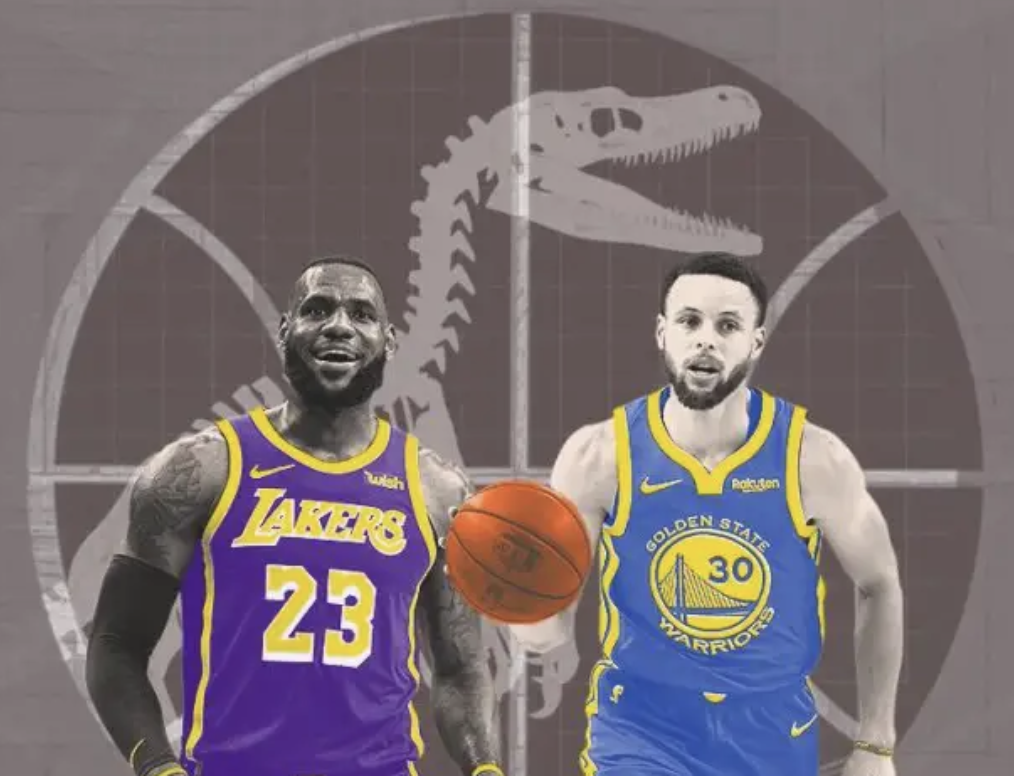

In [1]:
import pandas as pd
import numpy as np
!pip install -q pandasql
import sqlite3
from pandasql import sqldf
! pip install -q https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.express as px
import pandas_profiling

  Preparing metadata (setup.py) ... done


Ejemplo de publicacion actual de estadistica del equipo Toronto Raptors:

<https://ar.global.nba.com/teams/stats/raptors/>

##1) **OBJETIVO:** PREDECIR GRUPOS DE JUGADORES DETERMINADOS DE ACUERDO A UN PATRON DE COMPORTAMIENTO.
ESTE LISTADO DE JUGADORES SERA IMPORTANTE PARA LOS CLUBES, QUIENES EN LA PROXIMA TEMPORADA ABRIRAN LA COMPRA-VENTA DE JUGADORES, Y PODREMOS VER QUIENES SERAN LOS MEJORES DE CADA GRUPO.

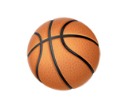
##2) BASE DE DATOS DE ESTADISTICA RAPTOR DE JUGADORES DE LA NBA 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
dfR = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Raptor por Jugador.xlsx')

dfR

####Tipo de Datos

In [ ]:
dfR.dtypes

##*3*) DEFINICION DE LAS VARIABLES
**Raptor Ofensivo**: cantidad de puntos que produce un jugador cada 100 posesiones ofensivas
**Raptor Defensivo**: cantidad de puntos que produce un jugador cada 100 posesiones defensivas
**Raptor Total**: suma de las 2 anteriores.
**Victorias Playoffs**: cantidad de victorias en los juegos playoffs
**Victorias Periodo**: cantidad de victorias en el periodo indicado
**Victorias Total**: suma de las 2 variables anteriores
**Ataque Ofensivo**: cantidad de puntos que produce un jugador cada 100 ataques.
**Ataque Defensivo**: cantidad de puntos que produce un jugador cada 100 posesiones cuando defiende.
**Ataque Total**: suma de las 2 anteriores.
**Ritmo**: numero de posesiones de un jugador a lo largo de 48 min.


##4) CHEQUEO DE LOS DATOS

####Identificar Valores Nulos

In [ ]:
dfR.isnull().sum()

El dataframe no posee valores nulos

####Chequear Valores Duplicados

In [ ]:
dfR.duplicated()

In [ ]:
print(dfR.shape)
dfR= dfR.drop_duplicates()
print(dfR.shape)

No se encuentran valores duplicados

In [ ]:
pysqldf = lambda q: sqldf(q, globals())

####Agrupo los valores por jugador calculando el promedio de las 4 variables mas relevantes para el analisis

In [ ]:
df1 = dfR.groupby(['Nombre'])[['Raptor Total','Victoria Total','Ataque Total','Ritmo']].mean() 
df1.style.highlight_max(color='green').highlight_min(color='pink')


##5) ANALISIS ESTADISTICO DEL DATASET

In [ ]:
df1.describe().round()

,Raptor Total,Victoria Total,Ataque Total,Ritmo
count,3571.0,3571.0,3571.0,3571.0
mean,246.0,277.0,225.0,258.0
std,194.0,230.0,188.0,202.0
min,0.0,0.0,0.0,0.0
25%,86.0,64.0,76.0,97.0
50%,200.0,242.0,160.0,223.0
75%,355.0,442.0,335.0,374.0
max,1560.0,1747.0,1667.0,998.0


In [ ]:
profile = pandas_profiling.ProfileReport(df1)
profile

####Correlacion de las variables

In [ ]:
sns.pairplot(data=df1,aspect=.95,hue='Raptor Total')
plt.show()

In [ ]:
plt.figure(figsize=(6,4)) 
sns.heatmap(df1.corr(), annot=True)
plt.show()

De estos grafico de correlacion se observa que el raptor total tiene una correlacion positiva con la victoria total y el ataque total.

####Visualizacion de outliers en el diagrama de caja y bigotes

In [ ]:
ax=sns.boxplot(data=df1)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
ax.set_title('Boxplot de variables')
ax.set_ylabel('Puntaje en promedio')
plt.show()

####Renombro las columnas

In [ ]:
df1.columns

In [ ]:
df1.columns = ['RT' , 'VT', 'AT' , 'R']
df1.columns

####Calculo de Outliers

In [ ]:
q1 = np.quantile(df1.RT, 0.25) 
q3 = np.quantile(df1.RT, 0.75) 
 
iqr = q3-q1 
 
upper_bound = q3+(1.5*iqr) 
lower_bound = q1-(1.5*iqr) 

promedio = df1.RT.mean()

print('valor maximo:', upper_bound)
print('valor minimo:',lower_bound)
print('Promedio:',promedio)

In [ ]:
q1 = np.quantile(df1.VT, 0.25) 
q3 = np.quantile(df1.VT, 0.75) 
 
iqr = q3-q1 
 
upper_bound = q3+(1.5*iqr) 
lower_bound = q1-(1.5*iqr) 

promedio = df1.VT.mean()

print('valor maximo:', upper_bound)
print('valor minimo:',lower_bound)
print('Promedio:',promedio)

In [ ]:
q1 = np.quantile(df1.AT, 0.25) 
q3 = np.quantile(df1.AT, 0.75) 
 
iqr = q3-q1 
 
upper_bound = q3+(1.5*iqr) 
lower_bound = q1-(1.5*iqr) 

promedio = df1.AT.mean()

print('valor maximo:', upper_bound)
print('valor minimo:',lower_bound)
print('Promedio:',promedio)

In [ ]:
q1 = np.quantile(df1.R, 0.25) 
q3 = np.quantile(df1.R, 0.75) 
 
iqr = q3-q1 
 
upper_bound = q3+(1.5*iqr) 
lower_bound = q1-(1.5*iqr) 

promedio = df1.R.mean()

print('valor maximo:', upper_bound)
print('valor minimo:',lower_bound)
print('Promedio:',promedio)

####Quito los outliers del dataframe

In [ ]:
df1.drop(df1[(df1['RT'] <=757.9583333333333) & (df1['VT'] <= 1010.5) & (df1['AT'] <= 722.217787114846)& (df1['R'] <= 790.7128496503497)].index, inplace=True)
df1.style.background_gradient(cmap='BuGn')


In [ ]:
len(df1)

In [ ]:
ax=sns.boxplot(data=df1)
ax.set_title('Boxplot de variables')
ax.set_ylabel('Puntaje en promedio')
plt.show()

Grafico el mismo grafico con la libreria Plotly

In [ ]:
px.box(df1)

##6) **HIPOTESIS A VERIFICAR**

####HIPOTESIS: los 10 jugadores con Raptor total mas alto son los que tienen mayor victoria total

In [ ]:
dtop10 = df1.nlargest(10, ['RT']) 
dtop10.style.highlight_max(color='green').highlight_min(color='pink')


In [ ]:
sns.lineplot(x= "RT", y="VT", data = dtop10)
plt.title('Raptor Total Vs Victoria Total')
plt.xlabel('Raptor Total')
plt.ylabel('Victoria Total')
plt.show()

Grafico las 4 variables con la libreria Plotly

In [ ]:
px.line(dtop10)

Vemos que la hipotesis no se cumple ya que jugadores con raptor alto no tienen la victoria total mas alta

####HIPOTESIS: los jugadores con Raptor total mas alto tienen mayor cantidad de ataques totales

In [ ]:
import plotly.express as px

In [ ]:
sns.scatterplot(data=dtop10, x="RT", y="AT", hue="Nombre")
plt.title('Ataque total Vs Raptor Total')
plt.xlabel('Raptor Total')
plt.ylabel('Ataque Total')

plt.legend(loc = 10, bbox_to_anchor = (1.3,0.5))

plt.show()


In [ ]:
import plotly.express as px

Grafico con la libreria Plotly

In [ ]:
px.scatter(dtop10, x='RT', y='AT')

No se cumple la hipotesis porque los jugadores con el raptor total mas alto tienen el ataque total por debajo del maximo

##7) **APRENDIZAJE NO SUPERVISADO**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import Normalizer
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import metrics 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_blobs
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [ ]:
df1

In [ ]:
df2 = round(df1, 2)
df2

In [ ]:
df2.isnull().sum()

In [ ]:
df2.dtypes

In [ ]:
X_kmeans = df2
X_kmeans.head()

####Escalamiento de los valores

In [ ]:
scaler = Normalizer()
scaler.fit(X_kmeans)

X_scaled = scaler.transform(X_kmeans)
dfescalado=pd.DataFrame(X_scaled,columns=X_kmeans.columns,index=X_kmeans.index)
dfescalado

In [ ]:
dfescalado.isnull().sum()

In [ ]:
dfescalado.dtypes

In [ ]:
np.any(np.isnan(dfescalado))

In [ ]:
np.all(np.isfinite(dfescalado))

In [ ]:
import math

####Curva del codo para determinar el numero de clusters

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(dfescalado)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Metodo del codo')
plt.xlabel('Numero de clusters')
plt.ylabel('Inercia')
plt.show()

A partir del 4to cluster la reducción en la suma total de cuadrados internos parece estabilizarse, indicando que K = 4 es una buena opción. Elijo K = 4

####Indice de Silhouette

Verifico mediante el indice de Silhouette si el numero de cluster elegido es correcto

In [ ]:
range_n_clusters = range(2, 15)
valores_medios_silhouette = []

for n_clusters in range_n_clusters:
    modelo_kmeans = KMeans(
                        n_clusters   = n_clusters, 
                        n_init       = 20, 
                        random_state = 123
                    )
    cluster_labels = modelo_kmeans.fit_predict(dfescalado)
    silhouette_avg = silhouette_score(dfescalado, cluster_labels)
    valores_medios_silhouette.append(silhouette_avg)
    
fig, ax = plt.subplots(1, 1, figsize=(6, 3.84))
ax.plot(range_n_clusters, valores_medios_silhouette, marker='o')
ax.set_title("Indices silhouette")
ax.set_xlabel('Número clusters')
ax.set_ylabel('Media índices silhouette');

El valor medio de los índices silhouette se maximiza con 2 clusters

####Silhouette Score

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

fig, ax = plt.subplots(2, 2, figsize=(15,8))

for i in [2, 3, 4]: 

    km = KMeans(n_clusters=i, n_init=10, max_iter=100, random_state=42) 
    labels=km.fit_predict(dfescalado)
    score=metrics.silhouette_score(dfescalado, labels, metric='euclidean')

    eje1, eje2 = divmod(i, 2) 
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[eje1-1][eje2])

    visualizer.fit(dfescalado) 
    
    ax[eje1-1][eje2].set_title(f'numero de clusters={i}, silhouette score promedio: {round(score,2)}')
    ax[eje1-1][eje2].set_xlabel("silhouette score")
    plt.tight_layout()

A traves de las graficas del Silhouette Score vemos que en la segunda grafica los grosores de cada cluster son mas parejos, por lo que lo optimo son 3 clusters

####Dendograma

Aplicando hierarchical clustering aglomerativo vemos en forma grafica cuales son las agrupaciones de datos segun la distancia euclideana y determinamos el numero de clusters

In [ ]:
modelo_hclust_complete = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'complete',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_complete.fit(X=dfescalado)

modelo_hclust_average = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'average',
                            distance_threshold = 0,
                            n_clusters         = None
                        )
modelo_hclust_average.fit(X=dfescalado)

modelo_hclust_ward = AgglomerativeClustering(
                            affinity = 'euclidean',
                            linkage  = 'ward',
                            distance_threshold = 0,
                            n_clusters         = None
                     )
modelo_hclust_ward.fit(X=dfescalado)

In [ ]:
def plot_dendrogram(model, **kwargs):
  
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

In [ ]:
fig, axs = plt.subplots(3, 1, figsize=(8, 8))
plot_dendrogram(modelo_hclust_average, color_threshold=0, ax=axs[0])
axs[0].set_title("Distancia euclídea, Linkage average")
plot_dendrogram(modelo_hclust_complete, color_threshold=0, ax=axs[1])
axs[1].set_title("Distancia euclídea, Linkage complete")
plot_dendrogram(modelo_hclust_ward, color_threshold=0, ax=axs[2])
axs[2].set_title("Distancia euclídea, Linkage ward")
plt.tight_layout();

Linkage complete (distancia maxima o similitud minima)

Linkage average (distancia o similitud promedio)

Linkage ward (distancia menor o similitud maxima)

Segun estos 3 dendogramas podriamos tener 2, 3 y 4 clusters, pero vemos que en el dendogra de maxima similitud se distinguen 3 clusters, por lo que se confirma que el numero optimo de clusters es 3

####Entreno el Algoritmo

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=3)
kmeans.fit(dfescalado)

labels = kmeans.predict(dfescalado)
centroids = kmeans.cluster_centers_
centroids

In [ ]:
df3 = df2.reset_index()
df3

In [ ]:
Clusters = pd.DataFrame(labels)
Clusters

In [ ]:
Clusters.columns=['Clusters']
Clusters.columns

In [ ]:
Clusters

####Obtencion de Clusteres

In [ ]:
dfunificado = pd.merge(df3, Clusters, how='left', on=None, left_on=None, right_on=None,
         left_index=True, right_index=True, sort=True)
dfunificado

####Rand Index

In [ ]:
dfunificado

In [ ]:
dff = dfunificado.drop('Nombre',axis=1)
dff

In [ ]:
dff['Clusters'].value_counts()

In [ ]:
Y = dff['Clusters'] 
X = dff.drop('Clusters',axis=1)

In [ ]:
k_means = KMeans(n_clusters = 3)
k_means.fit(dff)

In [ ]:
metrics.rand_score(Y,k_means.labels_)

In [ ]:
metrics.adjusted_rand_score(Y,k_means.labels_)

Estas metricas cercanas a 1 indican que dos métodos de agrupación concuerdan perfectamente en la agrupación de cada par de elementos.

##8) RESULTADOS FINALES

####Grafico los clusters

In [ ]:
import plotly as py
import plotly.graph_objs as go

In [ ]:
l=['RT', 'VT', 'AT', 'R']
plt.figure(figsize=(20,20))
for i in range(len(l)):
    plt.subplot(3,3,i+1)
    sns.boxplot(x=dfunificado.Clusters,y=dfunificado[l[i]])
    plt.title(l[i])

plt.show()

In [ ]:
import plotly as py
import plotly.graph_objs as go

trace1 = go.Scatter3d(x= dfunificado['RT'], y= dfunificado['VT'], z= dfunificado['AT'],
    mode='markers', marker=dict(color = dfunificado['Clusters'],size= 15,line=dict(color= dfunificado['Clusters'],width= 18),opacity=0.8))

layout = go.Layout(title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'RT'),
            yaxis = dict(title  = 'VT'),
            zaxis = dict(title  = 'AT'),
        )
)

fig = go.Figure(data=[trace1], layout=layout)
py.offline.iplot(fig)

##9) VALIDACION

Metodo RANDOM FOREST

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, roc_auc_score
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt

In [ ]:
dfunificado

In [ ]:
dfinal = dfunificado.drop("Nombre", axis=1)
dfinal

####Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
X = dfinal.drop("Clusters", axis=1)
y = dfinal.Clusters

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42,stratify=y)

In [ ]:
y_train.value_counts()/len(y_train)

In [ ]:
y_test.value_counts()/len(y_test)

In [ ]:
model = RandomForestClassifier(random_state=345, n_estimators=2000,min_samples_split=5,max_depth=20,class_weight="balanced")
model.fit(X_train, y_train)

In [ ]:
clf=RandomForestClassifier(n_estimators=2000, 
                           max_depth=20,
                           min_samples_split=5,
                           random_state=345 
                           ) 

In [ ]:
clf.fit(X_train,y_train) 

y_pred=clf.predict(X_test)

####Accuracy (porcentaje total de valores correctamente clasificados, tanto positivos como negativos)

In [ ]:
accuracy_score(y_test, y_pred)

El random forest tiene una efectividad del 93,2%, esto es que el 93,2% de los casos sabe diferenciar correctamente los grupos de clusters.

####Matriz de Confusion

In [ ]:
confusion_matrix(y_test, y_pred) 

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

cm = metrics .confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Cluster 0','Cluster 1','Cluster 2'])
disp.plot(ax=ax,cmap=plt.cm.Reds)
plt.show()

Podemos observar mediante la matriz de confusion que el modelo tuvo 4 errores, clasificando 1 elemento en cluster 1, cuando deberia clasificarse en el cluster 0; 1 elemento en el cluster 2, cuando deberia clasificarse en el cluster 1 y 2 elementos en el cluster 1, cuando deberia clasificarse en el cluster 2.

####Precision (porcentaje de valores que se han clasificado como positivos son realmente positivos)

In [ ]:
y_test.head()

In [ ]:
y_pred

In [ ]:
precision_score(y_test, y_pred, 
                pos_label='positive', 
                average='micro')

####Recall (verdaderos positivos correctamente clasificados)

In [ ]:
recall_score(y_test, y_pred, 
                pos_label='positive', 
                average='micro')

####Valor F1 (combinacion de precision y recall)

In [ ]:
f1_score(y_test, y_pred,
                pos_label='positive', 
                average='micro') 

####Reporte de Metricas

In [ ]:
print(classification_report(y_test,y_pred, 
                            digits=2))

####Curva ROC

In [ ]:
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.preprocessing import label_binarize
from sklearn import svm, datasets
from itertools import cycle
from sklearn.model_selection import train_test_split

In [ ]:
dfinal

In [ ]:
X = dfinal.drop("Clusters", axis=1)
y = dfinal.Clusters

In [ ]:
y = dfinal.Clusters
n_classes = y.shape
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

In [ ]:
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [90]:
#y = label_binarize(y, classes=[0, 1, 2])
y = dfinal.Clusters
n_classes = y.shape
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=lw,
        label="ROC curve of class {0} (area = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Some extension of Receiver operating characteristic to multiclass")
plt.legend(loc="lower right")
plt.show()

TypeError: ignored

In [91]:
y_prob = classifier.predict_proba(X_test)

macro_roc_auc_ovo = roc_auc_score(y_test, y_prob, multi_class="ovo", average="macro")
weighted_roc_auc_ovo = roc_auc_score(
    y_test, y_prob, multi_class="ovo", average="weighted"
)
macro_roc_auc_ovr = roc_auc_score(y_test, y_prob, multi_class="ovr", average="macro")
weighted_roc_auc_ovr = roc_auc_score(
    y_test, y_prob, multi_class="ovr", average="weighted"
)
print(
    "One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovo, weighted_roc_auc_ovo)
)
print(
    "One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
    "(weighted by prevalence)".format(macro_roc_auc_ovr, weighted_roc_auc_ovr)
)

One-vs-One ROC AUC scores:
0.999539 (macro),
0.999530 (weighted by prevalence)
One-vs-Rest ROC AUC scores:
0.999539 (macro),
0.999501 (weighted by prevalence)


En esta sección, calculamos el AUC utilizando los esquemas OvR y OvO. Reportamos un promedio macro y un promedio ponderado por prevalencia.

Estas curvas indican que el modelo sabe identificar las clases, ya que el area bajo las curvas se acercan a 1

In [ ]:
print('roc_auc_score: ', roc_auc_score (y_test, y_score))

## 10) VALIDACION CRUZADA

####LOOCV (Leave One Out Cross Validation)

In [ ]:
dfinal

In [ ]:
data = dfinal.values
X, y = data[:, :-1], data[:, -1]
print(X.shape, y.shape)

In [ ]:
from sklearn.model_selection import LeaveOneOut

cv = LeaveOneOut()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=1)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, 
                         scoring='accuracy', 
                         cv=cv)  

scores

In [ ]:
print(f'Accuracy: {np.mean(scores)}')

####K-Fold cross validation

In [ ]:
dfinal

In [ ]:
y = dfinal.Clusters

In [ ]:
X = dfunificado.drop (columns = ['Nombre', 'Clusters']) 
X

In [ ]:
from sklearn.model_selection import KFold

kf =KFold(n_splits=6,
          shuffle=True,
          random_state=42
          )

In [ ]:
cnt = 1

for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

In [ ]:
from sklearn import linear_model

score = cross_val_score(linear_model.LinearRegression(),
                        X, y, 
                        cv= kf,
                        scoring="neg_mean_squared_error")*-1 
print(f'MSE para cada fold: {score}')

In [ ]:
def rmse(score):
    rmse = np.sqrt(score) 
    return rmse

In [ ]:
print(f'RMSE promedio: {rmse(score.mean())}')

####Stratified K-Fold cross validation

In [ ]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=6, 
                     shuffle=True, 
                     random_state=42)

In [ ]:
cnt = 1
for train_index, test_index in kf.split(X, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

In [ ]:
from sklearn.linear_model import LogisticRegression

score = cross_val_score(linear_model.LogisticRegression(random_state= 42), 
                        X, y,
                        cv= kf, 
                        scoring="accuracy")

score

In [ ]:
print(f'Average score: {"{:.2f}".format(score.mean())}')

####Randomized search CV

Aplicamos esta técnica de optimización de hiperparámetros para determinar la precisión del modelo

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
dfunificado

In [ ]:
A = dfunificado.drop ('Nombre', axis = 1)
A

In [ ]:
B = A.drop ('Clusters', axis = 1)
B

In [ ]:
x = B
y = A['Clusters']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [ ]:
forest_params = {'max_depth': [1,2,3,4], 
                  'max_features': [1,2,3,4]}

In [ ]:
rfc = RandomForestClassifier()

In [ ]:
clf = RandomizedSearchCV(rfc, 
                   forest_params,  
                   cv = 3, 
                   scoring='accuracy', 
                   n_iter=15, 
                   verbose=1,
                   random_state=123)

clf.fit(X_train, y_train)

In [ ]:
print(f"parametros con mejor resultado: {clf.best_params_}")
print("")
print(f"accuracy: {clf.best_score_}") 

In [ ]:
rfc_final=RandomForestClassifier(max_depth=3, max_features=3,random_state=54)

In [ ]:
rfc_final.fit(X_train, y_train)

In [ ]:
y_pred=rfc_final.predict(X_test)

In [ ]:
metrics.accuracy_score(y_test,y_pred)

Si bien se aplicaron varias tecnicas de validacion cruzada a modo de ejercitacion, solo se tomará en cuenta para este proyecto el resultado arrojado por RANDOMIZED SEARCH CV ya que es la tecnica es la mas se ajusta al modelo de aprendizaje no supervisado.
RANDOMIZED SEARCH CV, que es la busqueda aleatoria de la mejor combinacion de hiperparametros, arroja un accuracy de 0,915, lo que significa que es una combinacion de hiperparametros aceptable.


##11) CONCLUSIONES

######Los jugadores con mayor ritmo se encuentran agrupados en el CLUSTER 0 y muy por debajo de esos valores quedan el resto de las variables
######Los jugadores con el mayor puntaje de estadistica raptor (variable predominante) se encuentran agrupados en el CLUSTER 1, ademas tambien son jugadores con habilidades de atacante.


De estos resultados podemos concluir diciendo que segun las caracteristicas de los jugadores que requiera cada equipo, podra seleccionar entre los que se encuentren en cada grupo; por ejemplo si un equipo necesita jugadores mayormente atacantes, podra interesarse en los jugadores que integran el CLUSTER 1.

##12) INSIGHTS

In [ ]:
dfunificado.head(10)


In [ ]:
Ccero = dfunificado[(dfunificado.Clusters==0)]
Ccero.head(10)

In [ ]:
Ccerofiltro = Ccero.sort_values(by="R", ascending=False)
print (Ccerofiltro.head(5))

In [ ]:
Cuno = dfunificado[(dfunificado.Clusters==1)]
Cuno.head(10)

In [ ]:
Cunofiltro = Cuno.sort_values(by="RT", ascending=False)
print (Cunofiltro.head(5))

In [ ]:
Cdos = dfunificado[(dfunificado.Clusters==2)]
Cdos.head(10)

In [ ]:
Cdosfiltro = Cdos.sort_values(by="AT", ascending=False)
print (Cdosfiltro.head(5))

####Caracteristicas de cada Clusters

In [ ]:
dfunificado[['RT', 'VT','AT','R', 'Clusters']].groupby(['Clusters']).mean()

CLUSTER 0: son jugadores que se destacan por la altisima posesion de pelota durante el juego; mientras que en el resto de las caracteristicas se clasifican en un bajo nivel.
CLUSTER 1: los jugadores agrupados en este cluster se caracterizan por tener un raptor total alto, buenos atacantes y una cantidad de victorias considerables; mientras que en posesion de pelota tienen un bajo rendimiento.
CLUSTER 2: son jugadores especialmente atacantes.

####La proyección de resultados señalan a los favoritos de cada grupo: 
 - Carldell Johnson, Kim English y Tom Kropp son los jugadores con mayor posesion de pelota
 - DeJon Jarreau, Nick Fazekas y Sim Bhullar son los jugadores que se destacan por tener un Raptor Total alto (variable principal del cluster 1), buena cantidad de victorias y ser buenos atacantes
 -  Tony Mitchell, John McCullough y Bob Miller son los jugadores que se destacan por se atacantes.
